In [24]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from joblib import dump

# Satisfaction analysis

## Based on the engagement and experience analysis conducted above, engagement and experience scores are assigned to each user. 

### 1. Engagement score
* Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

In [2]:
# centroid file from previous outputs
enga_centr = pd.read_csv('../data/centero_engagment.csv')
enga_centr = enga_centr.iloc[:,1:]
enga_centr

,Total UL and DL,Dur. (ms),sessions frequency
0,-0.016779,5.426540,0.046624
1,0.010122,-0.050115,2.807734
2,1.255802,-0.240627,-0.218187
3,-0.003391,-0.416837,-0.232634
4,-0.012356,1.331077,-0.210421
5,-1.267445,-0.254945,-0.220096


In [3]:
# Import standardized engagement metric values 
enga_metr = pd.read_csv('../data/std_engagement.csv')
enga_metr.index = enga_metr['MSISDN/Number']
enga_metr = enga_metr.iloc[:,1:4]
enga_metr.head()

,Total UL and DL,Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-1.158862,20.571127,-0.495197
3.360100e+10,0.921507,15.109232,-0.495197
3.360100e+10,-0.575403,15.069424,-0.495197
3.360101e+10,2.095055,14.589959,-0.495197
3.360101e+10,0.701781,11.820586,0.731244


In [4]:
# calculating the distance between the metric values and the centroid of the the first k-means cluster
engagement_score = euclidean_distances(enga_metr.values.tolist(),[enga_centr.values.tolist()[0]])
engagement_score

array([[15.19725081],
       [ 9.7431243 ],
       [ 9.67423628],
       ...,
       [ 4.6098002 ],
       [ 4.66140288],
       [ 4.69795229]])

In [5]:
engagement_score = [val[0] for val in engagement_score.tolist()]
engagement_score[:2]

[15.197250809682346, 9.74312429734232]

### 2. Experience score

In [6]:
# Get centroid value from the previous files
exper_centr = pd.read_csv('../data/centro_experience.csv')
exper_centr = exper_centr.iloc[:,1:]
exper_centr

,Average RTT,Average TCP,Average throughput
0,0.750121,-0.506215,-0.744667
1,-1.231973,0.827418,-0.153788
2,0.516965,-0.343330,1.407385


In [7]:
# standardized experience metric values
exper_metr = pd.read_csv('../data/std_experience.csv')
exper_metr.index = exper_metr['MSISDN/Number']
exper_metr = exper_metr.iloc[:106856,1:4]
exper_metr

,Average TCP,Average throughput,Average RTT
MSISDN/Number,,,
3.366117e+10,-1.357519,15.220434,0.510533
3.369817e+10,0.711986,11.928930,-0.596697
3.367251e+10,-1.480467,11.918292,-0.714487
3.365169e+10,-1.396600,10.960414,-0.855836
3.366856e+10,0.692157,10.681835,-0.596697
...,...,...,...
3.361648e+10,0.761222,-0.552987,-0.855836
3.362400e+10,0.761222,-0.552987,-1.303439
3.376193e+10,0.761222,-0.552987,-0.125535


In [8]:
# Calculating the distance between the metric values and the centroid of the the first k-means cluster
experience_score = euclidean_distances(exper_metr.values.tolist(),[exper_centr.values.tolist()[0]])
experience_score

array([[15.91681976],
       [12.43608382],
       [12.62318573],
       ...,
       [ 0.62099545],
       [ 0.32674662],
       [ 1.99688282]])

In [9]:
experience_score = [val[0] for val in experience_score.tolist()]
experience_score[:2]

[15.916819757061338, 12.436083819066894]

### Take the average of the two scores and infer a satisfaction score.

In [11]:
#creating a dataframe to contain both engagement and experience score with index being 'MSISDN/Number' to identify the user
df = pd.DataFrame()
df['engagement_score'] = engagement_score
df['experience_score'] = experience_score
df.index = enga_metr.index
#result
df.head()

,engagement_score,experience_score
MSISDN/Number,,
3.360100e+10,15.197251,15.916820
3.360100e+10,9.743124,12.436084
3.360100e+10,9.674236,12.623186
3.360101e+10,9.419218,11.666377
3.360101e+10,6.470615,11.189179


In [12]:
# Create a new column for the dataframe representing satisfaction score
df['satisfaction_score'] = (df['engagement_score'] + df['experience_score'])/2
df.head()

,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.197251,15.916820,15.557035
3.360100e+10,9.743124,12.436084,11.089604
3.360100e+10,9.674236,12.623186,11.148711
3.360101e+10,9.419218,11.666377,10.542797
3.360101e+10,6.470615,11.189179,8.829897


In [13]:
# Top ten satisfied users ranked by their satisfaction score
top10_satisfied_customers = df.sort_values(by='satisfaction_score', ascending=False).iloc[:10,:]
top10_satisfied_customers.to_csv('../data/top10_satisfied_customers.csv')
top10_satisfied_customers

,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.197251,15.916820,15.557035
3.362632e+10,21.294820,4.031410,12.663115
3.361489e+10,20.046823,5.138379,12.592601
3.362578e+10,20.109022,3.021940,11.565481
3.360100e+10,9.674236,12.623186,11.148711
3.360100e+10,9.743124,12.436084,11.089604
3.360101e+10,9.419218,11.666377,10.542797
3.365973e+10,18.699547,0.817845,9.758696
3.360313e+10,14.090588,5.300302,9.695445


### Build a regression model of your choice to predict the satisfaction score of a customer.

In [15]:
# Form a new Model training Dataframe consisting all of the columns (the experience and engagement metrices) 
# along with the satisfaction score

train_df = enga_metr.copy(deep=True)
train_df['Average TCP'] = exper_metr['Average TCP'].to_list()
train_df['Average RTT'] = exper_metr['Average RTT'].to_list()
train_df['Average throughput'] = exper_metr['Average throughput'].to_list()
# Adding our average satisfaction score (this is going to be our predicted value)
train_df['satisfaction_score'] = df['satisfaction_score'].to_list()
train_df.head()

,Total UL and DL,Dur. (ms),sessions frequency,Average TCP,Average RTT,Average throughput,satisfaction_score
MSISDN/Number,,,,,,,
3.360100e+10,-1.158862,20.571127,-0.495197,-1.357519,0.510533,15.220434,15.557035
3.360100e+10,0.921507,15.109232,-0.495197,0.711986,-0.596697,11.928930,11.089604
3.360100e+10,-0.575403,15.069424,-0.495197,-1.480467,-0.714487,11.918292,11.148711
3.360101e+10,2.095055,14.589959,-0.495197,-1.396600,-0.855836,10.960414,10.542797
3.360101e+10,0.701781,11.820586,0.731244,0.692157,-0.596697,10.681835,8.829897


In [16]:
# Dividing the train data into actual train data (train + validation) and test data

train_data = train_df.iloc[:int(len(train_df) * 0.8),:]
test_data = train_df.iloc[int(len(train_df) * 0.8):,:]

In [18]:
train_x = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1:]

test_x = test_data.iloc[:,:-1]
test_y = test_data.iloc[:,-1:]

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(train_x,train_y,test_size=0.2,random_state=40)

In [21]:
# Training the Ridge Regression Model on the splited training data
# Implementing Ridge Regression Model
alpha_val = 0.8
rr = Ridge(alpha=alpha_val)
rr.fit(xtrain, ytrain)
# Validation value of the model
validation_score = rr.score(xtest, ytest)
print("The model score is: {:.5f}".format(validation_score))

The model score is: 0.88206


In [22]:
# Training the best Model(Ridge) on the whole train data
rr.fit(train_x, train_y)
# Test on the test data
final_score = rr.score(test_x,test_y)
print("The model final score is: {:.5f}".format(final_score))

The model final score is: 0.82090


In [25]:
# Saving the final Model using joblibs dump
dump(rr, '../models/satisfaction_model.joblib')

['../models/satisfaction_model.joblib']

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## K-means

In [26]:
cluster_df = df.iloc[:,:2]
cluster_df.head()

,engagement_score,experience_score
MSISDN/Number,,
3.360100e+10,15.197251,15.916820
3.360100e+10,9.743124,12.436084
3.360100e+10,9.674236,12.623186
3.360101e+10,9.419218,11.666377
3.360101e+10,6.470615,11.189179


In [27]:
# Creating a k-means (k=2)
km = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
label = km.fit_predict(cluster_df)
centroids = km.cluster_centers_

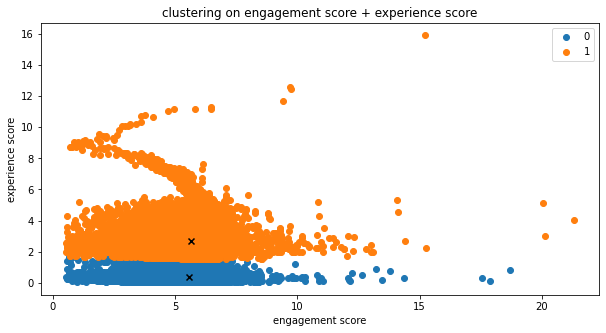

In [28]:
#plotting the results:
plt.figure(figsize=(10,5))
u_labels = np.unique(label)
plt.title(f'clustering on engagement score + experience score')
for i in u_labels:
    plt.scatter(cluster_df[label == i].iloc[:,0] , cluster_df[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1], marker='x', color = 'black')
plt.xlabel("engagement score")
plt.ylabel("experience score")
plt.legend()
plt.show()

In [31]:
# Create score table, add cluster to it, and save to csv file
df['cluster'] = label
df.head()



,engagement_score,experience_score,satisfaction_score,cluster
MSISDN/Number,,,,
3.360100e+10,15.197251,15.916820,15.557035,1
3.360100e+10,9.743124,12.436084,11.089604,1
3.360100e+10,9.674236,12.623186,11.148711,1
3.360101e+10,9.419218,11.666377,10.542797,1
3.360101e+10,6.470615,11.189179,8.829897,1


In [34]:
df.to_csv('../data/score_table.csv')
print("file successfully saved!!!")

file successfully saved!!!
